IMPORT LIBRARY YANG DIBUTUHKAN

In [6]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from kneed import KneeLocator
from sklearn.model_selection import GridSearchCV
from dtreeviz.trees import dtreeviz


PERSIAPAN DATA

In [7]:
# 1. PERSIAPAN DATA
data = pd.read_csv("winequality-red.csv")
print("Deskripsi dari dataset:")
print(data.describe())
print("\nNilai yang hilang per kolom:")
print(data.isnull().sum())

Deskripsi dari dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000      

PREPROCESSING DATA

In [8]:
# 2. PREPROCESSING DATA
X = data.drop('quality', axis=1)
y = data['quality']

# Menangani nilai yang hilang
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

RANDOM FOREST DAN DECISION TREE


Jumlah estimator (pohon) dalam Random Forest: 100


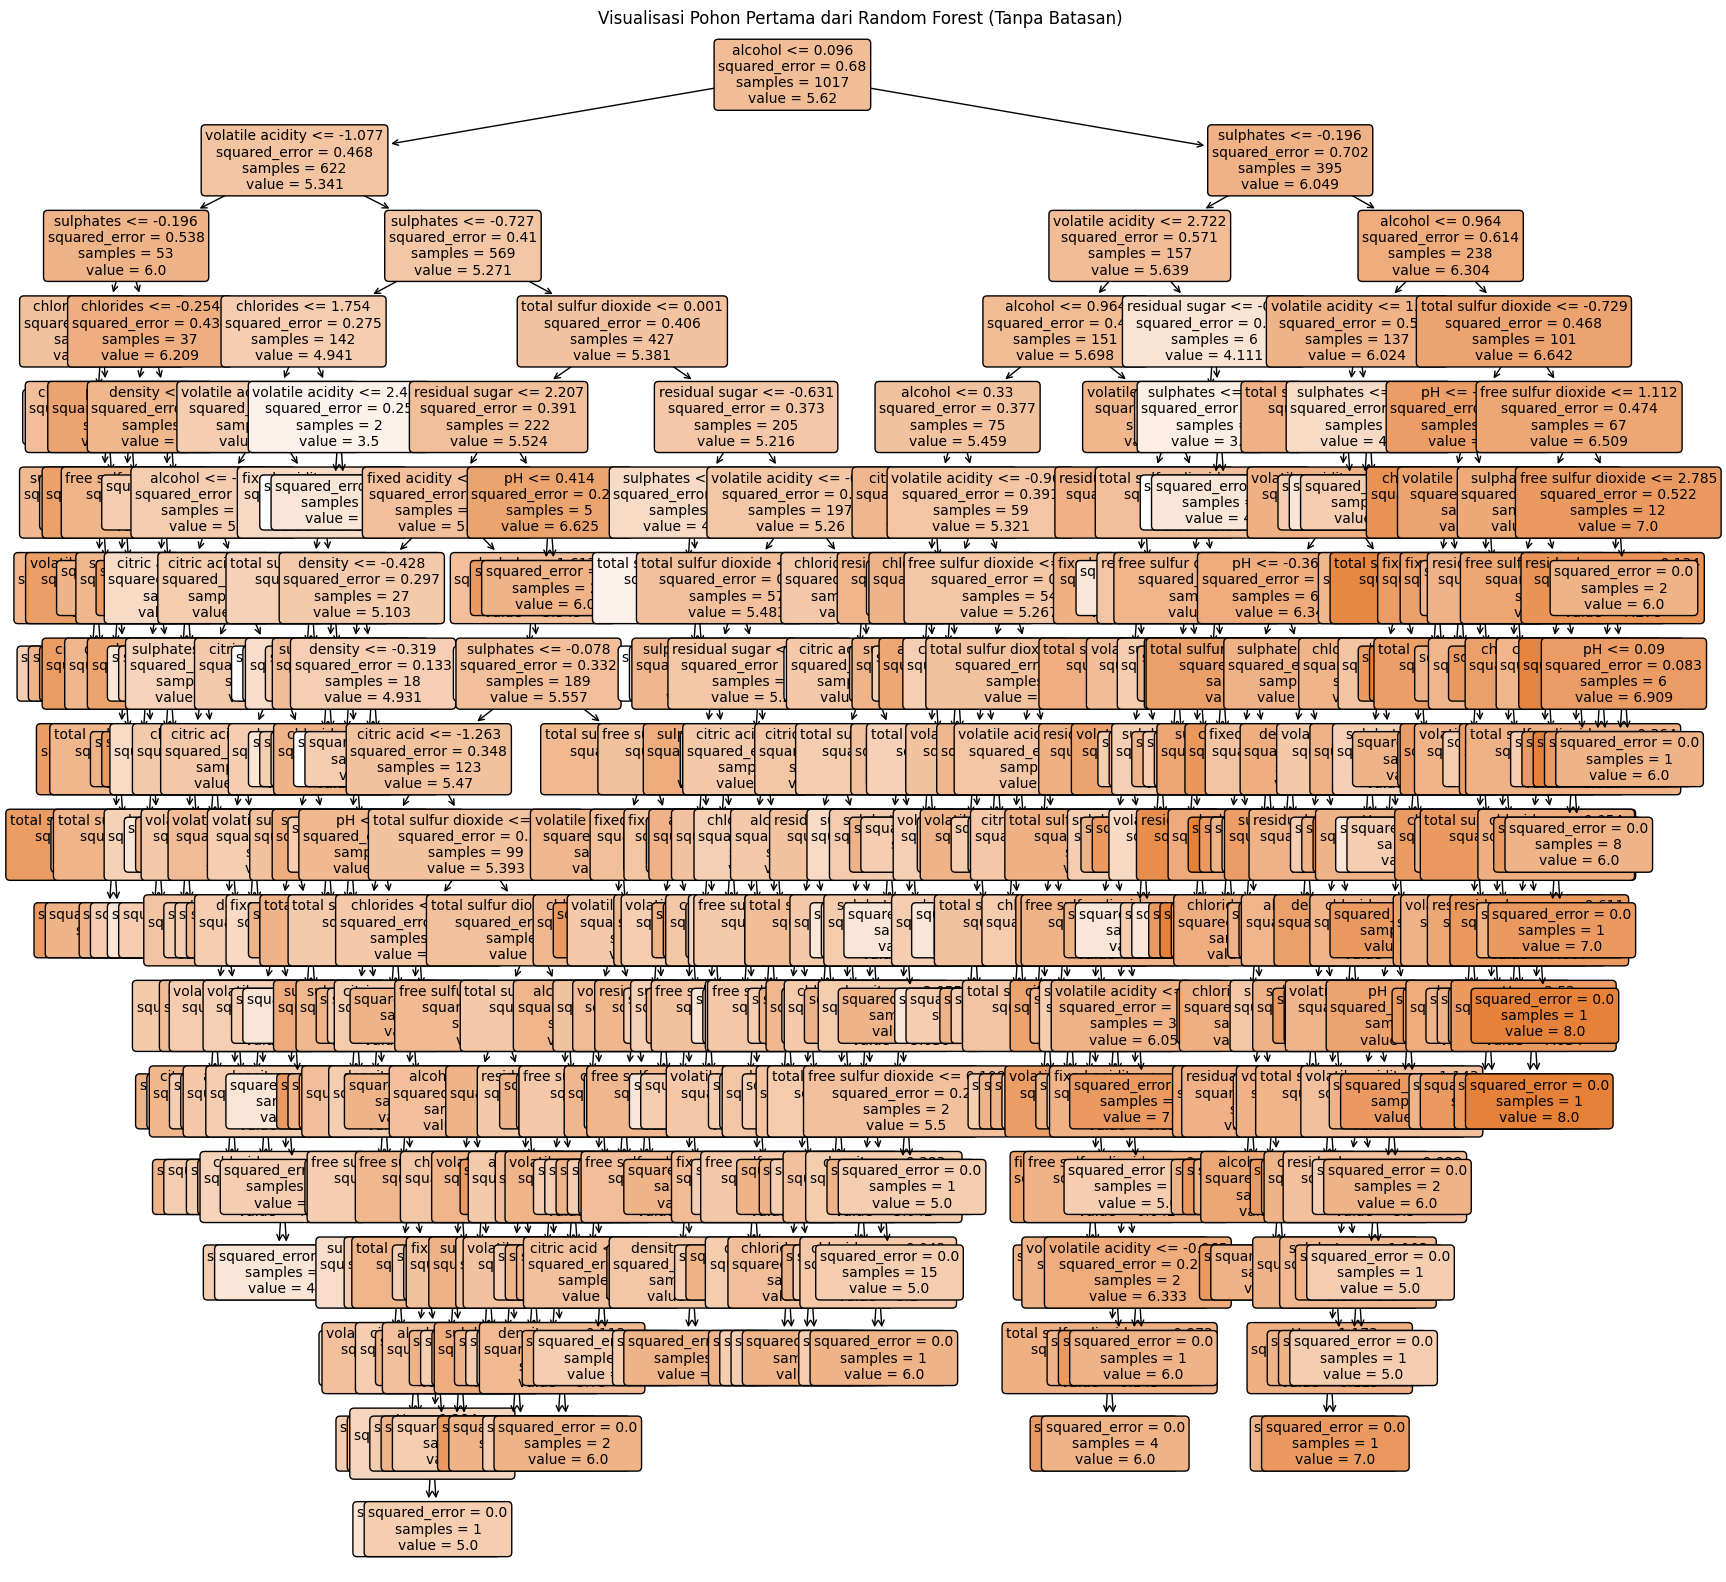

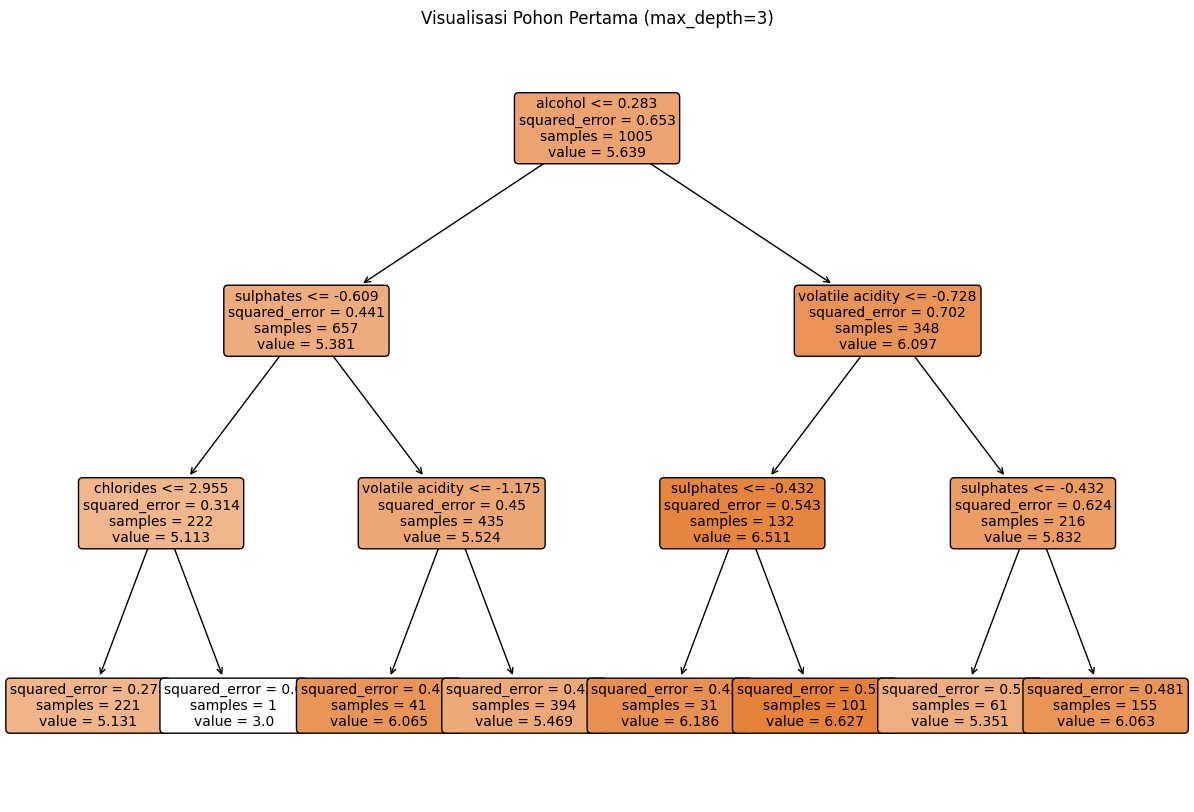


Ringkasan Model Random Forest (Tanpa Batasan):
Jumlah pohon (n_estimators): 100
Max depth pohon pertama: 17

Ringkasan Model Random Forest (Dengan Batasan):
Jumlah pohon (n_estimators): 100
Max depth: 3


In [9]:
# 3. RANDOM FOREST DAN VISUALISASI

# Inisialisasi dan training Random Forest tanpa batasan max_depth
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_scaled_df, y)

# Tampilkan jumlah estimator
print(f"\nJumlah estimator (pohon) dalam Random Forest: {len(rf.estimators_)}")

# Visualisasi pohon pertama menggunakan plot_tree
plt.figure(figsize=(20, 20))
plot_tree(rf.estimators_[0], 
          feature_names=list(X.columns), 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Visualisasi Pohon Pertama dari Random Forest (Tanpa Batasan)")
plt.show()

# Inisialisasi dan training Random Forest dengan max_depth=3
rf_limited = RandomForestRegressor(n_estimators=100, max_depth=3)
rf_limited.fit(X_scaled_df, y)

# Visualisasi pohon pertama dengan batasan kedalaman menggunakan plot_tree
plt.figure(figsize=(15, 10))
plot_tree(rf_limited.estimators_[0], 
          feature_names=list(X.columns), 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Visualisasi Pohon Pertama (max_depth=3)")
plt.show()

# Visualisasi menggunakan dtreeviz untuk model dengan batasan kedalaman
viz = dtreeviz(rf_limited.estimators_[0], 
               X_scaled_df, 
               y, 
               feature_names=list(X.columns), 
               target_name="Wine Quality")

# Menampilkan visualisasi dtreeviz
viz.view()

# Tampilkan ringkasan model
print("\nRingkasan Model Random Forest (Tanpa Batasan):")
print(f"Jumlah pohon (n_estimators): {rf.n_estimators}")
print(f"Max depth pohon pertama: {rf.estimators_[0].tree_.max_depth}")

print("\nRingkasan Model Random Forest (Dengan Batasan):")
print(f"Jumlah pohon (n_estimators): {rf_limited.n_estimators}")
print(f"Max depth: {rf_limited.max_depth}")

K-MEANS CLUSTERING


=== K-Means Clustering dengan Fitur Alcohol dan Quality ===


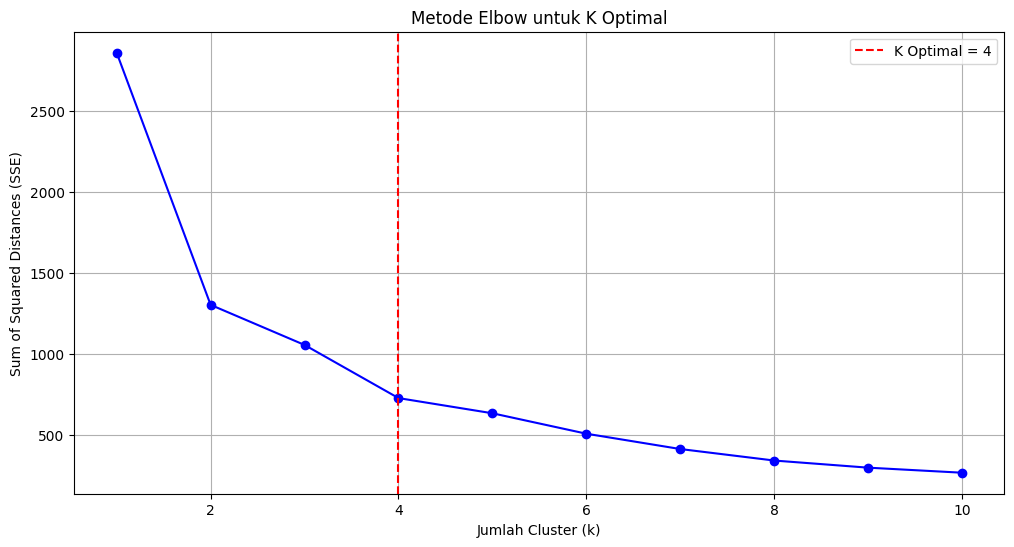

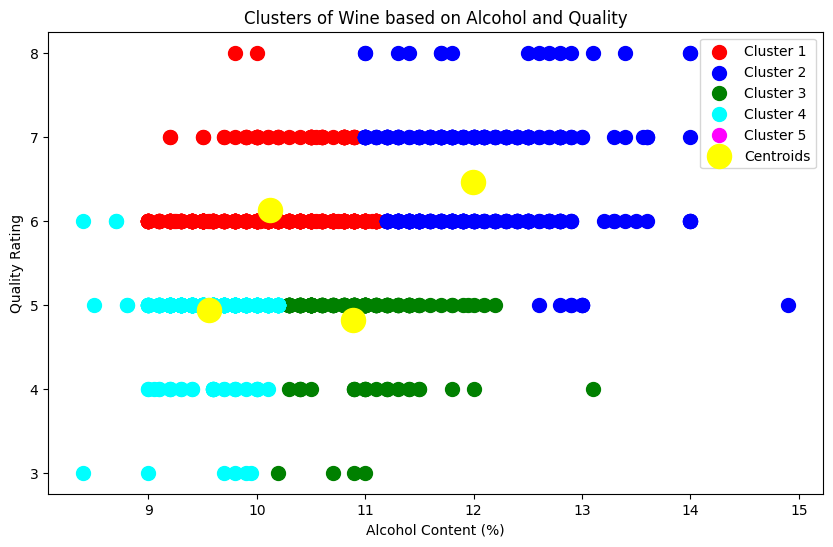

In [10]:
# 4. CLUSTERING DENGAN K-MEANS
# Mengambil fitur alcohol dan quality untuk clustering
X_wine = data.iloc[:, [10, 11]].values  # alcohol and quality
print("\n=== K-Means Clustering dengan Fitur Alcohol dan Quality ===")

# Metode Elbow untuk menentukan jumlah cluster optimal
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_wine)
    sse.append(kmeans.inertia_)

# Mencari k optimal
kl = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
optimal_k = kl.elbow

# Visualisasi Metode Elbow
plt.figure(figsize=(12, 6))
plt.plot(k_range, sse, 'bo-')
plt.axvline(x=optimal_k, color='r', linestyle='--', 
            label=f'K Optimal = {optimal_k}')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Metode Elbow untuk K Optimal')
plt.grid(True)
plt.legend()
plt.show()

# Menerapkan K-Means dengan k optimal
kmeans_wine = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans_wine = kmeans_wine.fit_predict(X_wine)

# Visualisasi hasil clusters dengan fitur alcohol dan quality
plt.figure(figsize=(10, 6))
plt.scatter(X_wine[y_kmeans_wine == 0, 0], X_wine[y_kmeans_wine == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_wine[y_kmeans_wine == 1, 0], X_wine[y_kmeans_wine == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_wine[y_kmeans_wine == 2, 0], X_wine[y_kmeans_wine == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_wine[y_kmeans_wine == 3, 0], X_wine[y_kmeans_wine == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_wine[y_kmeans_wine == 4, 0], X_wine[y_kmeans_wine == 4, 1], s=100, c='magenta', label='Cluster 5')

# Visualisasi centroid
plt.scatter(kmeans_wine.cluster_centers_[:, 0], kmeans_wine.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Menambahkan title, xlabel, ylabel
plt.title('Clusters of Wine based on Alcohol and Quality')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Quality Rating')
plt.legend()
plt.show()